# MELTS geobarometry part 3 - multi-phase saturation in mafic magmas

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

import petthermotools as ptt

ptt.__version__

alphaMELTS for Python files successfully located.


'0.3.19dev'

To demonstrate how PetThermoTools can be used to estimate the pressure of storage for any magma saturated in multiple solid phases we'll use the compsition of an olivine, clinopyroxene, and plagioclase saturated melt from experiment Y0174-12 of Neave et al. (2019). We'll also perform these minimizations using the Green et al. (2025) thermodynamic model implemented through MAGEMin (see installation instructions for how to run MAGEMin calculations).

In [2]:
bulk = {'SiO2_Liq': 49.47,
       'TiO2_Liq': 1.09,
       'Al2O3_Liq': 15.58,
       'FeOt_Liq': 12.60,
       'MgO_Liq': 7.56,
       'CaO_Liq': 11.63,
       'Na2O_Liq': 1.84,
       'K2O_Liq': 0.13,
       'H2O_Liq': 1.0,
       'Fe3Fet_Liq': 0.18}

Before we run the barometry calculations there are several other things that need to be specified:
- The oxygen fugacity of the system. **At the moment we cannot run these calculations at an fO2 buffer, instead the Fe redox state can be specified in the `bulk` variable above. This is due to a small bug that I'm trying to fix as soon as possible**
- The water content (also set in the `bulk` variable above).
- The pressure range and number of steps.
- The phases of interest.
- The thermodynamic model we want to use for the calculations.


In [3]:
# fO2_offset = 0.8 # offset from FMQ buffer
P_bar = np.linspace(250.0,7500.0,24) #bars
phases = ['olivine1', 'feldspar1', 'clinopyroxene1']
Model = "Green2025" # calculations performed using the rhyolite-MELTS v1.0.2 thermodynamic model as in Harmon et al. (2018)

Now we can use these parameters to calculate pressure. Note, with a natural glass data the H$_2$O content and oxygen fugacity may not be known, which leads to additional uncertainty in the calculation as these parameters have a notable influence on the saturation curves investigated here.

Notably, in the example below we'll also specify a maximum temperaure interval on 50 degrees Celsius below the liquidus and a temperature step for each calculatio of 1 degree Celsius.

In [4]:
minimum, xstal = ptt.mineral_cosaturation(bulk = bulk, 
                                   Model = Model,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 1150.0,
                                   dt_C = 1.0, # temperature interval for each calculation
                                   T_maxdrop_C = 50.0, # maximum temperature below the liquidus the code will search for 3 phase saturation
                                   timeout = 300,
                                   T_cut_C = 25.0) 
                                    

Julia environment detected.
alphaMELTS for Python files successfully located.
alphaMELTS for Python files successfully located.
alphaMELTS for Python files successfully located.
alphaMELTS for Python files successfully located.
alphaMELTS for Python files successfully located.
alphaMELTS for Python files successfully located.
alphaMELTS for Python files successfully located.
alphaMELTS for Python files successfully located.
Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
De

  Activating project at `~/.petthermotools_julia_env`  Activating
 project at `~/.petthermotools_julia_env`
  Activating project at `~/.petthermotools_julia_env`
  Activating  Activating  Activating

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


 project at `~/.petthermotools_julia_env`
 project at `~/.petthermotools_julia_env` project at `~/.petthermotools_julia_env`

  Activating project at `~/.petthermotools_julia_env`
  Activating project at `~/.petthermotools_julia_env`


Using libMAGEMin.dylib from MAGEMin_jll
Using libMAGEMin.dylib from MAGEMin_jll
Using libMAGEMin.dylib from MAGEMin_jllUsing libMAGEMin.dylib from MAGEMin_jllUsing libMAGEMin.dylib from MAGEMin_jll


Using libMAGEMin.dylib from MAGEMin_jllUsing libMAGEMin.dylib from MAGEMin_jllUsing libMAGEMin.dylib from MAGEMin_jll




Computing 51 points... 100%|█████████████████████████████| Time: 0:00:13puting 51 points...  86%|█████████████████████████    |  ETA: 0:00:02
Computing 51 points... 100%|█████████████████████████████| Time: 0:00:14puting 51 points...  90%|██████████████████████████▏  |  ETA: 0:00:01Computing 51 points...  98%|████████████████████████████▍|  ETA: 0:00:00
Computing 51 points... 100%|█████████████████████████████| Time: 0:00:12
Computing 51 points... 100%|█████████████████████████████| Time: 0:00:14
Computing 51 points... 100%|█████████████████████████████| Time: 0:00:12
Computing 51 points... 100%|█████████████████████████████| Time: 0:00:13
Computing 51 points... 100%|█████████████████████████████| Time: 0:00:12
Computing 51 points... 100%|█████████████████████████████| Time: 0:00:12
Computing 51 points... 100%|█████████████████████████████| Time: 0:00:13:04 51 points...  88%|█████████████████████████▋   |  ETA: 0:00:02
Computing 51 points... 100%|█████████████████████████████| Time: 0:

To investigate the results, we can use in-built plotting functions to look at the position of the saturation curves in P-T space:

(<Figure size 500x400 with 1 Axes>,
 <Axes: xlabel='P (bars)', ylabel='T ($\\degree$C)'>)

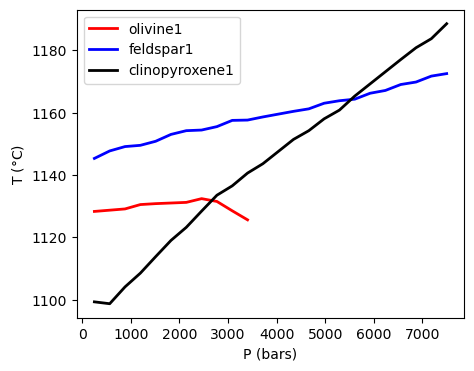

In [5]:
ptt.plot_surfaces(Results = minimum, P_bar = P_bar, phases = phases)

We can also investigate the temperature residual between the curves using the plottin function below.

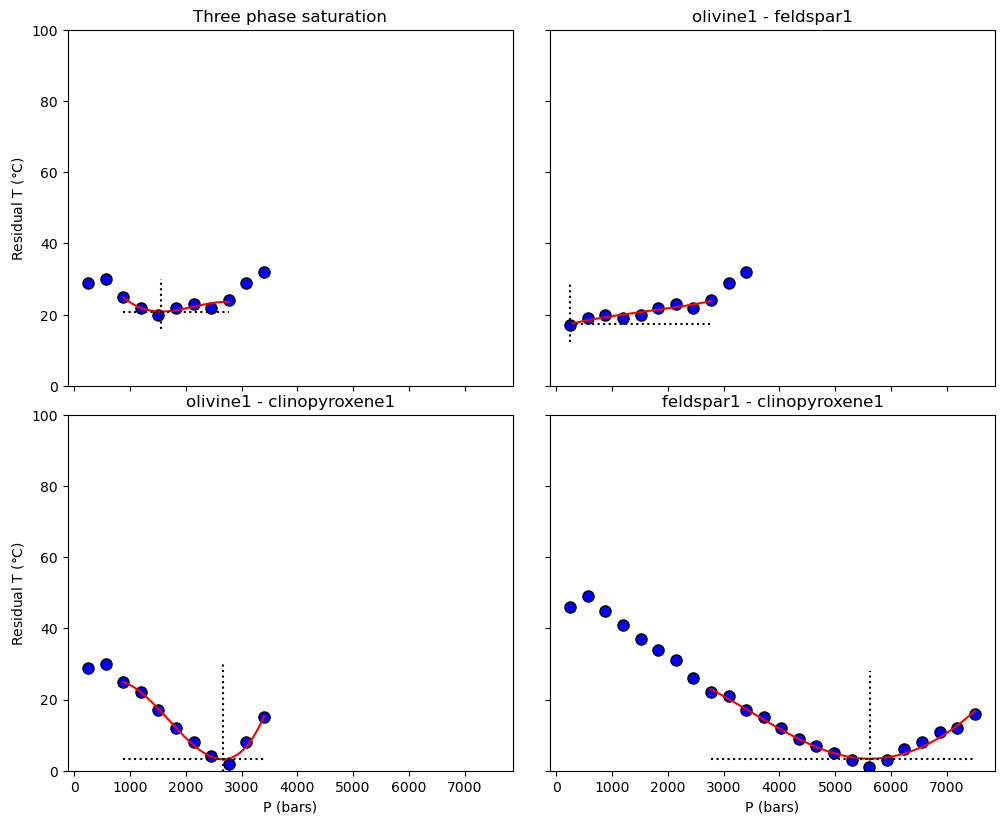

In [6]:
ptt.residualT_plot(Results = minimum, P_bar = P_bar, phases = phases, interpolate = True, ylim = [0, 100])